# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [1]:
!git clone https://github.com/siwenliao/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 104 (delta 18), reused 7 (delta 7), pack-reused 81 (from 1)
Receiving objects: 100% (104/104), 14.64 MiB | 10.20 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
%cd wrangling/assignment

/content/wrangling/assignment


In [5]:
import pandas as pd
import numpy as np

# 1: Numeric Variable

airbnb_df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False)
print(airbnb_df['Price'].unique(), '\n')
print('Before coercion: \n', airbnb_df['Price'].describe(), '\n')

# Remove commas to preserve as much data as possible and make sure that Pandas does not drop these values
airbnb_df['Price'] = airbnb_df['Price'].str.replace(",","")

# Coerce the values to numeric using the Pandas method
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

# Create a missing dummy
airbnb_df['Price_nan'] = airbnb_df['Price'].isnull()

# Results after coercion
print('After coercion: \n', airbnb_df['Price'].describe(), '\n')
print('Total missing values: \n', sum(airbnb_df['Price_nan']),'\n')


['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

First, I chose to remove the commas that act as a separater between the thouasandths digit and hundredths digit to prevent Pandas from dropping those values during coericion. Then, I coerced the data into numeric because 'Price' is numeric but was stored as an object. I ended up with 0 missing values.

In [6]:
# 2: Categorical Variable

police_df = pd.read_csv('./data/mn_police_use_of_force.csv',low_memory=False)

# Cleaning subject_injury: gives Yes when a person was injured by policy, No when no injury occurred

print(police_df['subject_injury'].unique(), '\n')
print(police_df['subject_injury'].value_counts(), '\n')

police_df['subject_injury_na'] = police_df['subject_injury'].isnull()
print('Total missing values: \n', sum(police_df['subject_injury_na']),'\n')

proportion_missing = sum(police_df['subject_injury_na']) / len(police_df['subject_injury'])
print('Proportion of missing values: \n', proportion_missing, '\n')

cross_tab = pd.crosstab(police_df['subject_injury'], police_df['force_type'])
print('Cross tabulation: \n', cross_tab, '\n')

cross_tab_na = pd.crosstab(police_df['subject_injury_na'], police_df['force_type'])
print('Cross tabulation with na: \n',cross_tab_na, '\n')



[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Total missing values: 
 9848 

Proportion of missing values: 
 0.7619342359767892 

Cross tabulation: 
 force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal Projectile  \
subject_injury                                                                 
No                             33                 34                       1   
Yes                            44                 40                       2   

force_type      Police K9 Bite  Taser  
subject_injury                         
No                           2    150  
Yes                         44    172   

Cross tabulation with na: 
 force_type         Baton  Bodi

Missingness

In [7]:
# 3: Dummy Variable

pretrial_df = pd.read_parquet('./data/justice_data.parquet')

print(pretrial_df['WhetherDefendantWasReleasedPretrial'].unique(), '\n')

pretrial_df['WhetherDefendantWasReleasedPretrial'] = pretrial_df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan)
print(pretrial_df['WhetherDefendantWasReleasedPretrial'].value_counts())

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [8]:
# 4: Missing Values, Not At Random

pretrial_df = pd.read_parquet('./data/justice_data.parquet')

print('ImposedSentenceAllChargeInContactEvent: \n', pretrial_df['ImposedSentenceAllChargeInContactEvent'].unique(), '\n')
print('SentenceTypeAllChargesAtConvictionInContactEvent: \n', pretrial_df['SentenceTypeAllChargesAtConvictionInContactEvent'].unique(), '\n')

print('Before coercion: \n', pretrial_df['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')

pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pretrial_df['ImposedSentenceAllChargeInContactEvent'].replace(" ", np.nan)

pretrial_df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(pretrial_df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

print('After coercion: \n', pretrial_df['ImposedSentenceAllChargeInContactEvent'].describe(), '\n')

ImposedSentenceAllChargeInContactEvent: 
 [' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.48

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [9]:
# 1
url = 'https://sharkattackfile.net/spreadsheets/GSAF5.xls'
shark_df = pd.read_excel(url)

# 2
shark_df.dropna(axis='columns', how='all', inplace=True)

# 3
print(shark_df['Year'].unique(), '\na')
shark_df['Year'] = shark_df['Year'].replace(0, np.nan)
shark_df['Year'] = pd.to_numeric(shark_df['Year'], errors='coerce')
shark_post1940 = shark_df[shark_df['Year']>=1940]
print(shark_post1940['Year'].value_counts(), '\n')

[2026. 2016. 2025. 2024. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909.
 1908. 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897.
 1896. 1895. 1894. 1893. 1892. 1891. 1890. 1889. 1888. 1887. 1886. 1885.
 1884. 1883. 1882. 1881. 1880. 1879. 1878. 1877. 1876. 1875. 1874. 1873.
 1872. 1871. 1870. 1869. 1868. 1867. 1866. 1865. 18

question 3

[39. 11. 27. 12. nan 56. 55. 24. 26. 25. 61. 40. 13. 14. 54. 48. 57.  8.
 63.  9. 19.  7. 85. 69. 18. 66. 21. 37. 16. 20. 42. 45. 30. 35. 29. 58.
 17. 36. 23. 28. 65. 38. 68. 33. 15. 41. 43. 49. 46. 64. 32. 10. 62. 22.
 52. 44. 47. 59. 50. 34. 77. 60.  1. 73. 67.  6. 53. 51. 31.  5. 71. 75.
 70.  4. 74.  3. 82. 72. 86. 84. 87. 81. 78.] 
a


<Axes: >

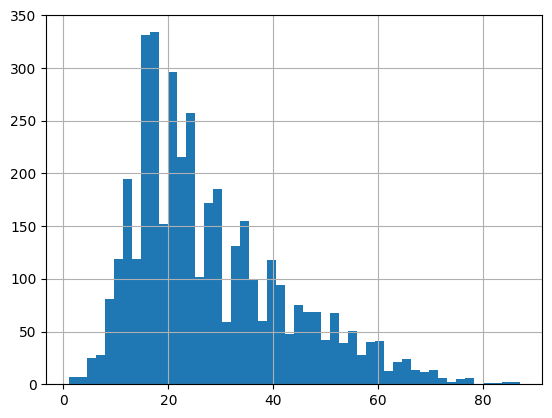

In [16]:
# 4
print(shark_df['Age'].unique(), '\na')

shark_df['Age'] = shark_df['Age'].replace(['MAKE LINE GREEN', '"young"', 'young',
                                            'X', '\xa0 ', ' ', 'A.M.', 'F', '!!',
                                           'M', '\xa0 ', '?', '  '], np.nan)
shark_df['Age'] = shark_df['Age'].replace(['!2', '18 months', '2½', '9 months',
                                           '2 to 3 months'], 1)
shark_df['Age'] = shark_df['Age'].replace(['!6','6½'], 5)
shark_df['Age'] = shark_df['Age'].replace(['Both 11', '9 or 10', '8 or 10', '9 & 12',
                                           '7 or 8', '10 or 12'], 10)
shark_df['Age'] = shark_df['Age'].replace(['teen', 'Teen', 'a minor', 'Teens',
                                           '?    &   14', '12 or 13', '13 or 18',
                                           '"young"', '17 & 16', 'young',
                                           '?    &   14', '13 or 14'], 15)
shark_df['Age'] = shark_df['Age'].replace(['20?','20 ', '18 to 22','18 or 20',
                                           '7      &    31', '21 & ?',
                                           '23 & 20', '16 to 18', '21 or 26',
                                           '? & 19', '36 & 23'], 20)
shark_df['Age'] = shark_df['Age'].replace(['20s', '20/30', '28 & 22', "20's",
                                           'mid-20s', '28 & 26', '28, 23 & 30',
                                           '23 & 26', '25 or 28', '17 & 35',
                                           '34 & 19'], 25)
shark_df['Age'] = shark_df['Age'].replace(['45 and 15',' 30', '25 to 35', '36 & 26',
                                           '32 & 30', ' 28', '21, 34,24 & 35',
                                           '30 & 32', '33 & 26', '31 or 33'], 30)
shark_df['Age'] = shark_df['Age'].replace(['30+', 'mid-30s', '30s', '33 & 37',
                                           '22, 57, 31', '9 & 60','30 or 36','Ca. 33',
                                           '33 or 37'], 35)
shark_df['Age'] = shark_df['Age'].replace(['40?', '46 & 34', 'adult', '(adult)',
                                           '37, 67, 35, 27,  ? & 27', '50 & 30',
                                           ' 43'], 40)
shark_df['Age'] = shark_df['Age'].replace(['40+', '45 '], 45)
shark_df['Age'] = shark_df['Age'].replace(['50+', '>50', '"middle-age"',
                                           'Middle age'], 55)
shark_df['Age'] = shark_df['Age'].replace(['60+', '60s', "60's", 'Elderly'], 65)
shark_df['Age'] = shark_df['Age'].replace('74 ', 75)
shark_df['Age'] = pd.to_numeric(shark_df['Age'], errors='coerce')
shark_df['Age'].hist(bins=50)

In [13]:
# 5
print(shark_df['Sex'].unique(), '\na')

shark_df['Sex'] = shark_df['Sex'].replace('F ', 'F')
shark_df['Sex'] = shark_df['Sex'].replace(['M ', ' M', 'm', 'M x 2'], 'M')
shark_df['Sex'] = shark_df['Sex'].replace(['lli', '.', 'N'], np.nan)

proportion_male_na = sum(shark_df['Sex']=='M') / len(shark_df['Sex'])
proportion_male = sum(shark_df['Sex']=='M') / sum(shark_df['Sex'].isin(['M', 'F']))
print('Proportion of victims that are male out of all victims: \n', proportion_male_na, '\n')
print('Proportion of victims that are male out victims with known gender: \n', proportion_male, '\n')


['M' 'F' nan] 
a
Proportion of victims that are male out of all victims: 
 0.802970297029703 

Proportion of victims that are male out victims with known gender: 
 0.8751348851549252 



In [12]:
# 6
print('Before cleaning: \n', shark_df['Type'].unique(), '\na')

shark_df['Type'] = shark_df['Type'].replace(['Questionable', 'Sea Disaster',
                                             np.nan, '?', 'Unconfirmed',
                                             'Unverified', 'Invalid',
                                             'Under investigation'], 'Unknown')
shark_df['Type'] = shark_df['Type'].replace('unprovoked', 'Unprovoked')
shark_df['Type'] = shark_df['Type'].replace([' Provoked', 'Watercraft', 'Boat'], 'Provoked')

print('After cleaing: \n', shark_df['Type'].unique(), '\na')

Before cleaning: 
 ['Unprovoked' 'Provoked' 'Questionable' 'unprovoked' ' Provoked'
 'Watercraft' 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat'] 
a
After cleaing: 
 ['Unprovoked' 'Provoked' 'Unknown'] 
a


In [14]:
# 7
print('Before cleaning: \n', shark_df['Fatal Y/N'].unique(), '\na')

shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].replace(['F', 'Y x 2', 'y'], 'Y')
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].replace(['M', np.nan, 'n',
                                                       'Nq', 'UNKNOWN',
                                                       2017, ], 'Unknown')
shark_df['Fatal Y/N'] = shark_df['Fatal Y/N'].replace([' N', 'N '], 'N')

print('After cleaning: \n', shark_df['Fatal Y/N'].unique(), '\na')

Before cleaning: 
 ['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y'] 
a
After cleaning: 
 ['N' 'Y' 'Unknown'] 
a


In [ ]:
# 8
unprovoked = shark_df[(shark_df['Type']=='Unprovoked')]
print(unprovoked['Sex'].value_counts(), '\n')

provoked=shark_df[(shark_df['Type'])=='Provoked']
print(unprovoked['Fatal Y/N'].value_counts(), '\n')
print(provoked['Fatal Y/N'].value_counts(), '\n')

fatal=shark_df[(shark_df['Fatal Y/N'])=='Y']
nonfatal=shark_df[(shark_df['Fatal Y/N'])=='N']
print(fatal['Sex'].value_counts(), '\n')

In [ ]:
# 9



**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper is about tidy datasets, defined by its structural framework of obervations as rows, variables as columns, and type of unit as tables. The paper seems to introduce the concept and talk about its benefits and applications to make data cleaning easier.
2. The "tidy data standard" intends to accomplish a consistent framework that can be used when cleaning every dataset and provide the foundation for initial exploration and analysis.
3. "Like families, tidy datasets are all alike but every messy dataset is messy in its own way" draws an analogy between datasets and families. Generally, when considering functional and "non-messy" families, there seems to be a framework that is visualized: a nice house, 1-3 kids, etc. However, when thinking of messy families, there isn't a standard framework. Each familiy may have different extended family drama, external pressures, internal issues, etc. Thus, the analogy means that similar to families, the range of tidy datasets is a lot more narrow then messy ones. "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" means that identifying the variables of interest is easy but figuring out specific relationships and how to capture the nuances of data is difficult.
4.  Values are being collected in a dataset. They are usually numbers if quantitative or strings if qualitative. A variable contains all values that measure the same underlying attribute across units. An observation contains all values measured on the same unit across attributes.
5. Tidy data is a standard way of mapping the meaning of a dataset to its structure. In tidy data, each variables forms a column, each observation forms a row, and each type of observational unit forms a table.
6) The five most common problems with messy datasets:
1) Column headers are values, not variable names.
2) Multiple variables are stored in one column.
3) Variables are stored in both rows and columns.
4) Multiple types of observational units are stored in the same table.
5) A single observational unit is stored in multiple tables.

The data in table 4 is messy because both the rows and columns are variables (3), and the the column headers are values instead of variable names (1). "Melting" a dataset is turning columns into rows. It is parametrised by a list of columns that are already variables.
7) Table 11 has variables stored in both rows and columns. The variables in individual columns such as year, but then it also has each day of the month as a separate column. Additionally, in each row, the minimum and maximum temperature is specified, so there are potentially two entries for each date. Table 12 addresses these issues. Table 12(a) is "molten" because it addresses the issues in the columns by condensing down the date. Table 12(b) is tidy because addresses the issue in the rows by making the minimum and maximum temperature columns.
Following the rules of a tidy dataset, there is one variable in each column, and each row represents a day's observations.
8) The "chicken-and-egg" problem with focusing on tidy data is that tidy data depends on the tools, and the tools are built for using tidy data. This loop is difficult to identify a breakthrough point because both the data structure and tools need to be changed accordingly to have significant improvements Wickham hopes that in the future, research will build on the tidy data framework to develop data storage strategies and better tools to improve data cleaning.